## 📦 Step 1: Install & Import Required Libraries

In [1]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.6/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 2.9/150.0 MB 4.9 MB/s eta 0:00:30
    --------------------------------------- 3.7/150.0 MB 4.6 MB/s eta 0:00:32
   - -------------------------------------- 4.7/150.0 MB 4.7 MB/s eta 0:00:32
   - -------------------------------------- 5.8/150.0 MB 4.8 MB/s eta 0:00:30
   - -------------------------------------- 6.6/150.0 MB 4.9 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/150.0 MB 4.8 MB/s eta 0:00:30
   -- ------------------------------------- 8.7/150.0 MB 4.8 MB/s eta 0:00:3


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 🧹 Step 2: Data Cleaning & Preprocessing

In [ ]:
# ✅ Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Correct theme setup
sns.set_style("whitegrid")
sns.set(font_scale=1.1)

# ✅ Load the dataset
df = pd.read_csv("DATASET_FILE")  # Ensure file is in the working directory
print("✅ Dataset loaded successfully!")
print("🔢 Dataset shape:", df.shape)

# ✅ Preview the first 5 rows
df.head()

✅ Dataset loaded successfully!
🔢 Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Basic structure and types of each column
df.info()

# Summary statistics (mean, std, min, max, etc.)
df.describe()

# Check for missing/null values in each column
missing_values = df.isnull().sum()
print("🔍 Missing values:\n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

📊 Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


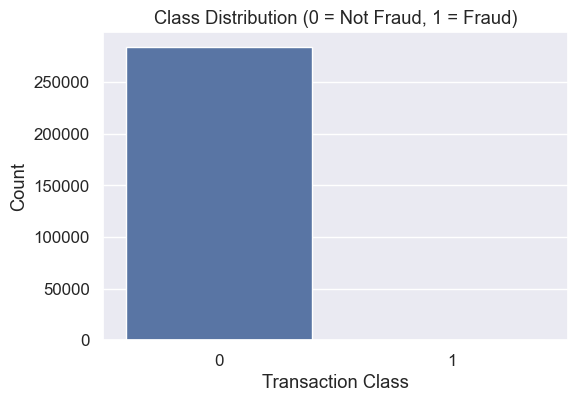

In [4]:
# Count of fraudulent (1) vs non-fraudulent (0)
class_counts = df['Class'].value_counts()
print("📊 Class distribution:\n", class_counts)

# Visualize class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

## 📊 Step 3: Exploratory Data Analysis (EDA)

In [5]:
# ✅ General dataset information
df.info()

# ✅ Statistical summary of all numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# ✅ Check for any missing/null values in each column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found.")
else:
    print("⚠️ Missing values found:")
    print(missing_values)

✅ No missing values found.



🔢 Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


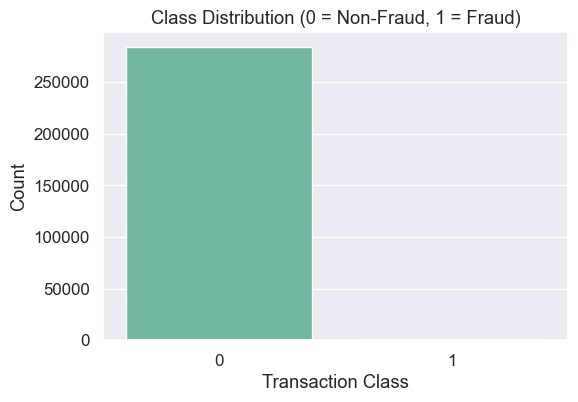

In [7]:
# ✅ View number of fraud vs non-fraud transactions
class_counts = df['Class'].value_counts()
print("\n🔢 Class Distribution:")
print(class_counts)

# ✅ Plot class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, hue='Class', palette='Set2', legend=False)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

## ⚖️ Step 4: Handling Class Imbalance with SMOTE

## 🧠 Step 5: Model Training & Evaluation (Random Forest, Logistic Regression, XGBoost, etc.)

## 📈 Step 6: Model Performance Metrics (Confusion Matrix, ROC-AUC, F1-score)

## 🧐 Step 7: Explainability using SHAP

## 🧪 Step 8: Final Results & Conclusion

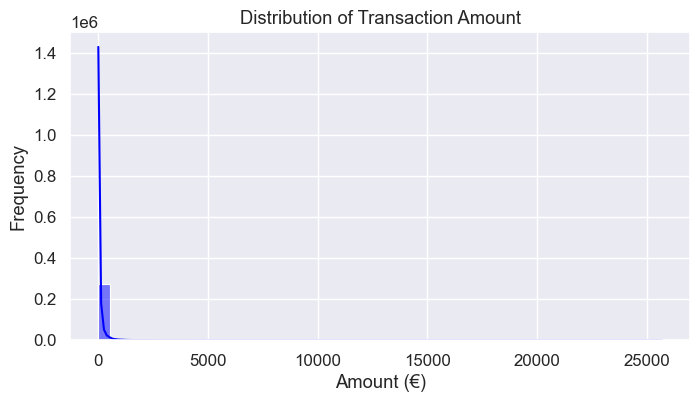

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount (€)")
plt.ylabel("Frequency")
plt.show()

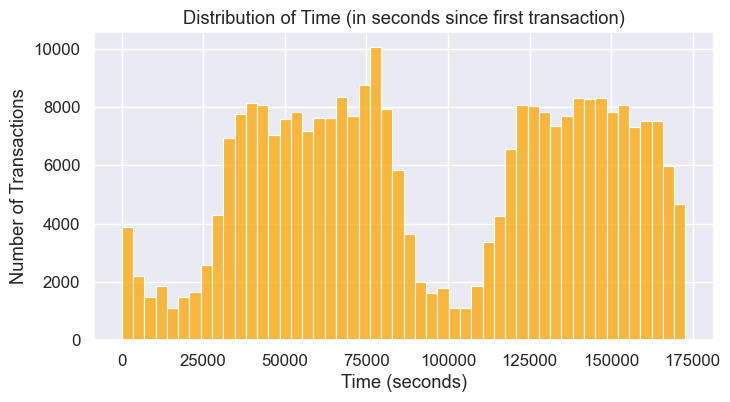

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50, kde=False, color='orange')
plt.title("Distribution of Time (in seconds since first transaction)")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Transactions")
plt.show()

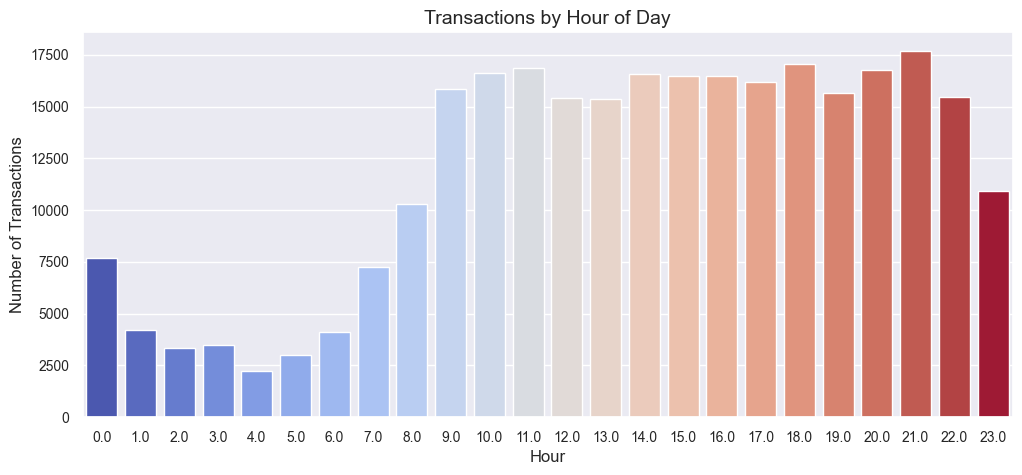

In [10]:
# Convert time to hour (0–23)
df['Hour'] = (df['Time'] // 3600) % 24

# Make the plot wider
plt.figure(figsize=(12,5))  # Increased width from 8 to 12
sns.countplot(x='Hour', data=df, hue='Hour', palette='coolwarm', legend=False)
plt.title("Transactions by Hour of Day", fontsize=14)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

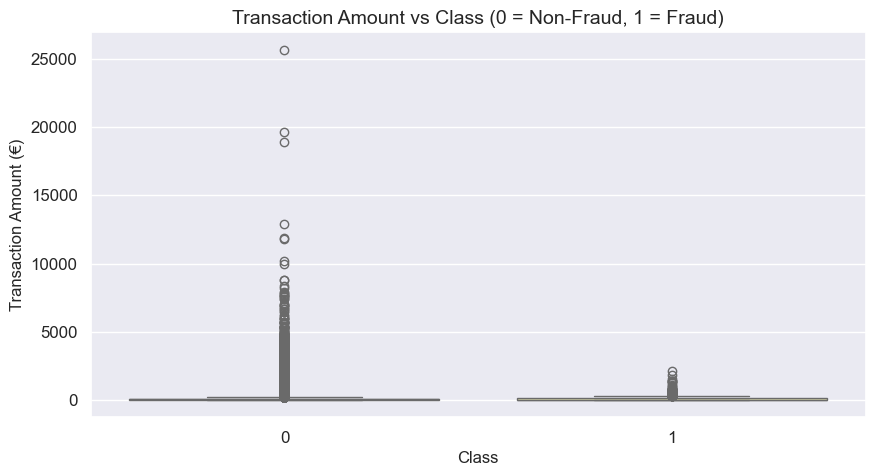

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', hue='Class', data=df, palette='Set3', dodge=False)
plt.title("Transaction Amount vs Class (0 = Non-Fraud, 1 = Fraud)", fontsize=14)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Transaction Amount (€)", fontsize=12)
plt.legend([],[], frameon=False)  # hide redundant legend
plt.show()


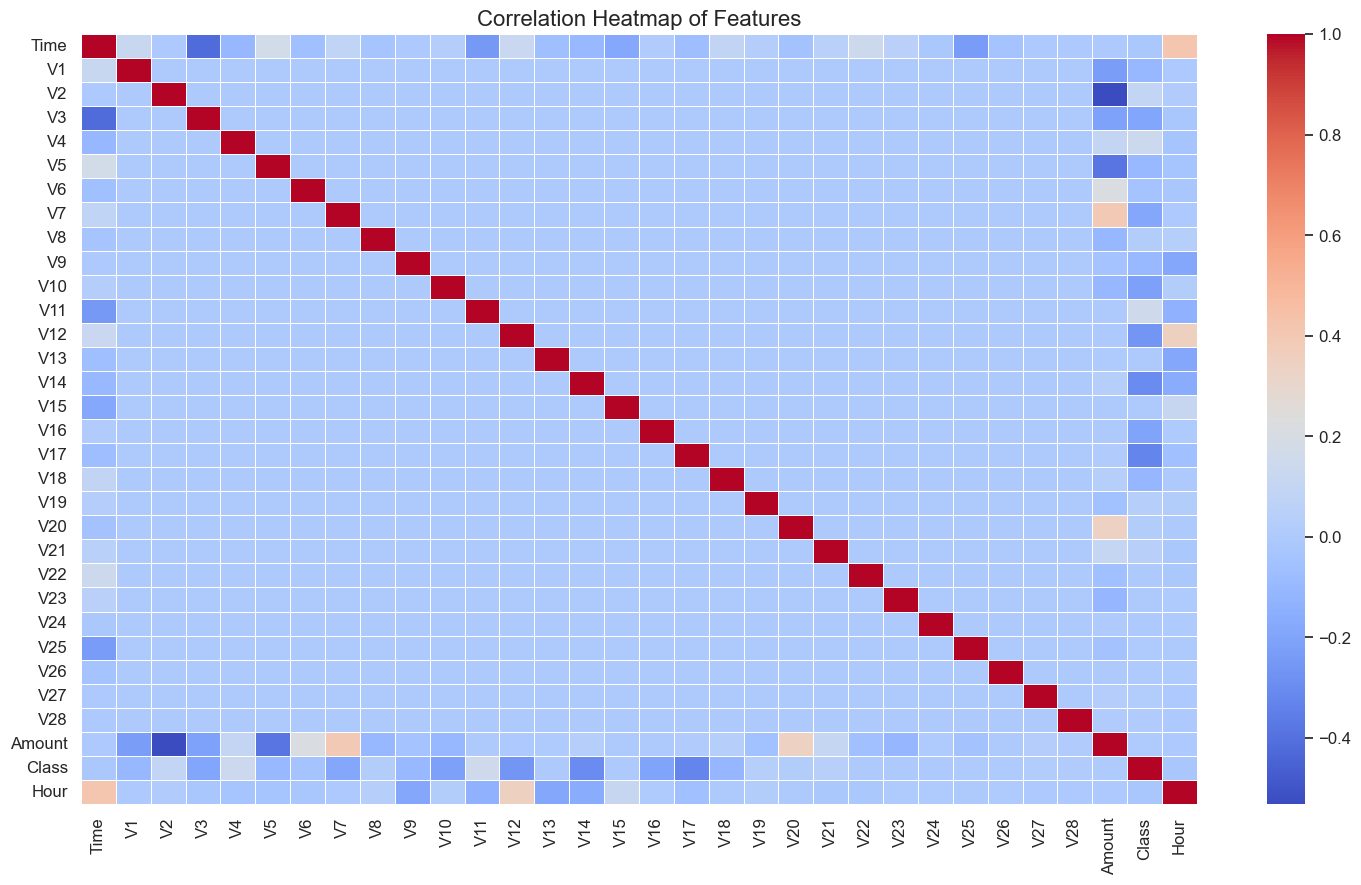

In [12]:
plt.figure(figsize=(18,10))
corr_matrix = df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

# Drop 'Time' — already extracted 'Hour'
df = df.drop(['Time'], axis=1)

# Scale 'Amount' and 'Hour' into new columns
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Hour_scaled'] = scaler.fit_transform(df[['Hour']])

# Drop original Amount and Hour
df = df.drop(['Amount', 'Hour'], axis=1)

# Show updated data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Hour_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-2.40693
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-2.40693
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-2.40693
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-2.40693
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-2.40693


In [14]:
# Split into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Training size: (227845, 30), Testing size: (56962, 30)


In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE balancing:")
print("Class distribution in training set:")
print(y_train_smote.value_counts())


After SMOTE balancing:
Class distribution in training set:
Class
0    227451
1    227451
Name: count, dtype: int64


In [17]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve,
    classification_report, ConfusionMatrixDisplay
)

import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Print report
    print(f"\n📊 {model_name} Results:")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # 👉 Plot Confusion Matrix as a graph
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label="PR Curve", color='darkorange')
    plt.title(f"{model_name} - Precision vs Recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid()
    plt.show()

    return {
        "Model": model_name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)


📊 Random Forest Results:
Confusion Matrix:
 [[56848    16]
 [   17    81]]


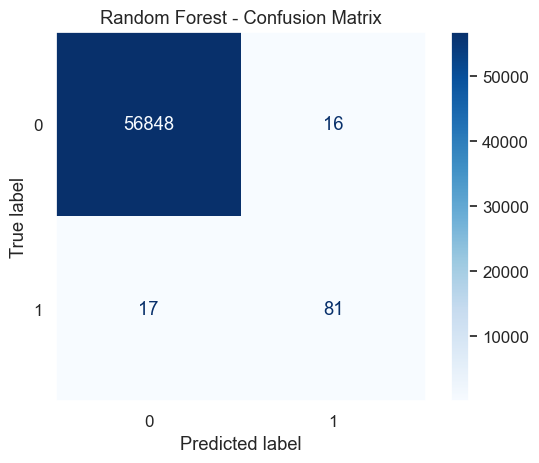


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9994
Precision: 0.8351
Recall: 0.8265
F1-Score: 0.8308
ROC-AUC Score: 0.9623


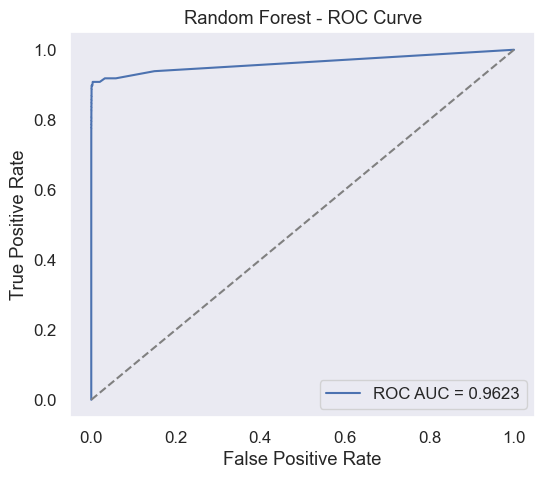

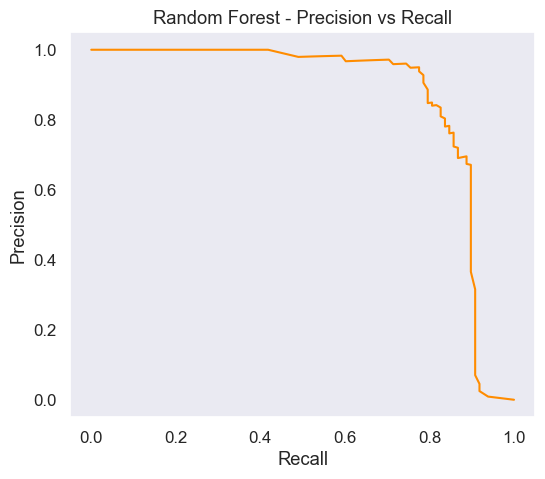

In [19]:
results_rf = evaluate_model(rf_model, X_test, y_test, model_name="Random Forest")

In [20]:
import joblib

# Save the trained model to a .pkl file
joblib.dump(rf_model, "random_forest_model.pkl")
print("✅ Random Forest model saved as random_forest_model.pkl")

✅ Random Forest model saved as random_forest_model.pkl



📊 Logistic Regression Results:
Confusion Matrix:
 [[55336  1528]
 [    8    90]]


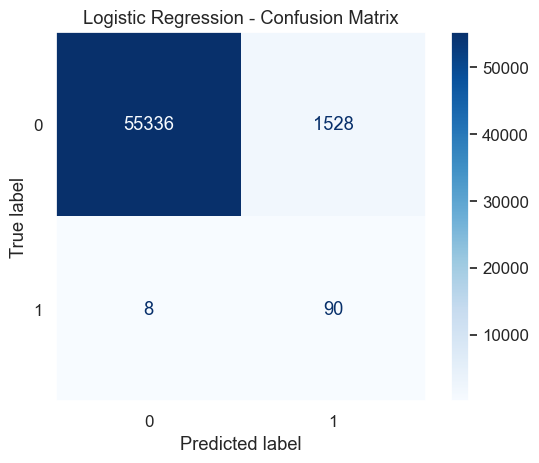


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Accuracy: 0.9730
Precision: 0.0556
Recall: 0.9184
F1-Score: 0.1049
ROC-AUC Score: 0.9705


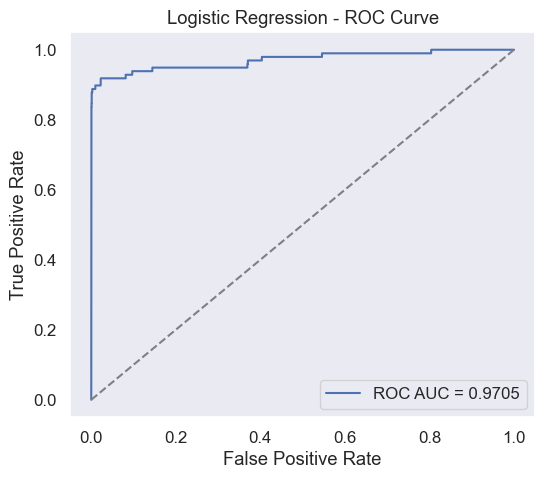

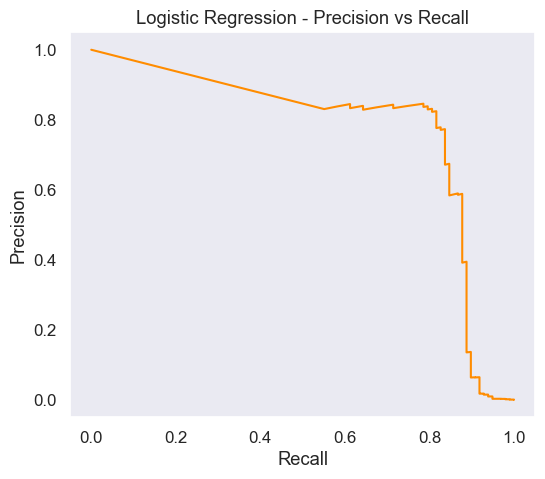

In [21]:
from sklearn.linear_model import LogisticRegression

# Train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

# Evaluate
results_lr = evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression")

In [22]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(lr_model, "logistic_regression_model.pkl")
print("✅ Logistic Regression model saved as logistic_regression_model.pkl")

✅ Logistic Regression model saved as logistic_regression_model.pkl



📊 XGBoost Results:
Confusion Matrix:
 [[56719   145]
 [   14    84]]


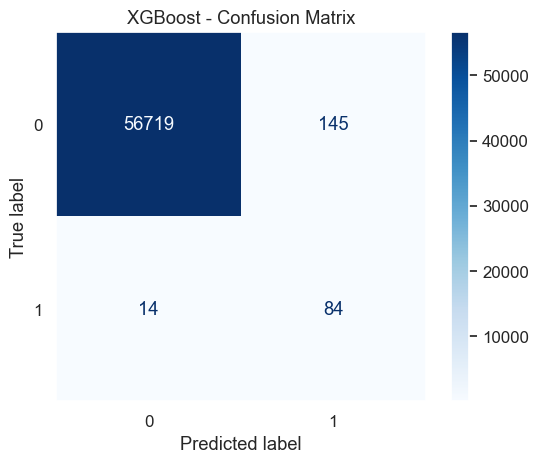


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.86      0.51        98

    accuracy                           1.00     56962
   macro avg       0.68      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9972
Precision: 0.3668
Recall: 0.8571
F1-Score: 0.5138
ROC-AUC Score: 0.9788


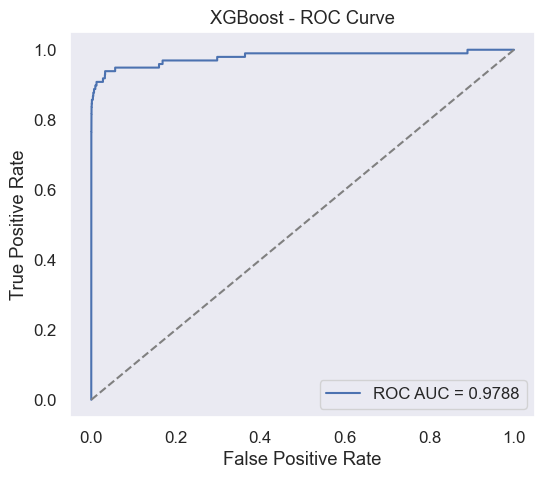

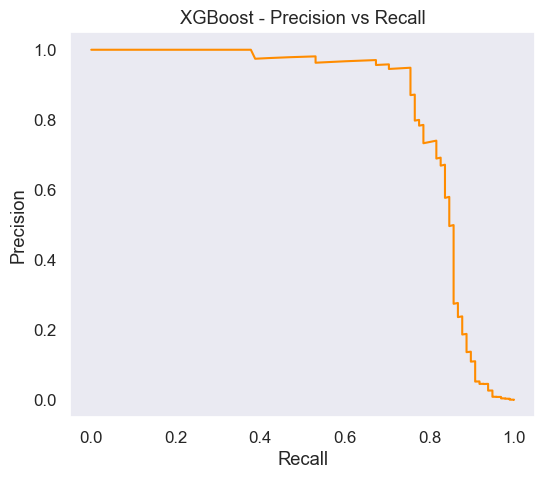

In [23]:
from xgboost import XGBClassifier

# Train
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_smote, y_train_smote)

# Evaluate
results_xgb = evaluate_model(xgb_model, X_test, y_test, model_name="XGBoost")


In [24]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")
print("✅ XGBoost model saved as xgboost_model.pkl")

✅ XGBoost model saved as xgboost_model.pkl


[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.057287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

📊 LightGBM Results:
Confusion Matrix:
 [[56724   140]
 [   14    84]]


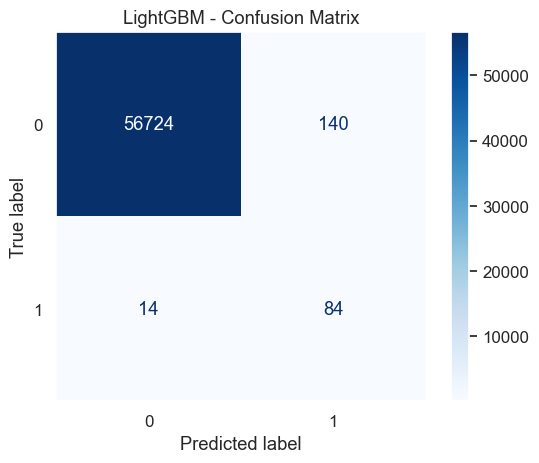


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.86      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.93      0.76     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9973
Precision: 0.3750
Recall: 0.8571
F1-Score: 0.5217
ROC-AUC Score: 0.9755


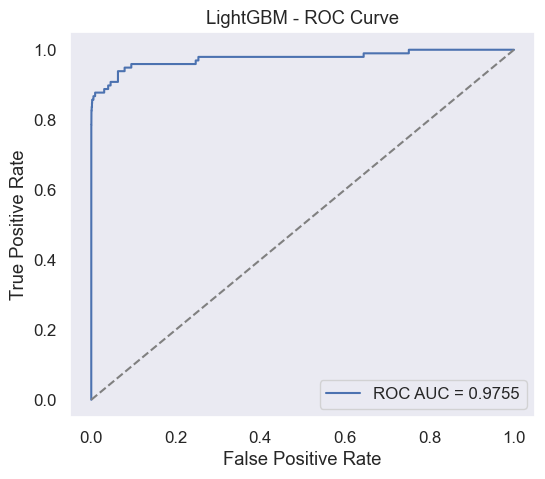

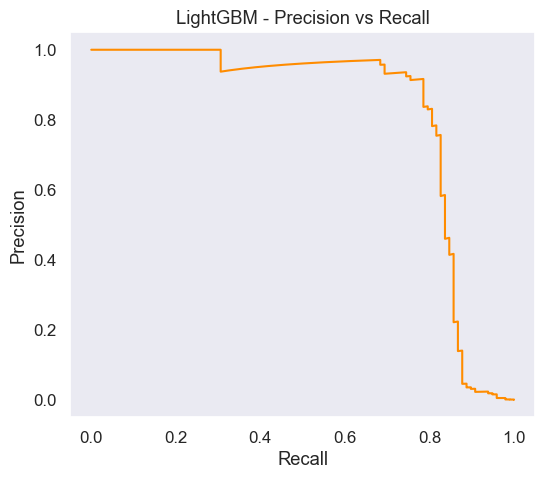

In [25]:
from lightgbm import LGBMClassifier

# Train
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
lgbm_model.fit(X_train_smote, y_train_smote)

# Evaluate
results_lgbm = evaluate_model(lgbm_model, X_test, y_test, model_name="LightGBM")


In [26]:
import joblib

# Save the trained LightGBM model
joblib.dump(lgbm_model, "lightgbm_model.pkl")
print("✅ LightGBM model saved as lightgbm_model.pkl")


✅ LightGBM model saved as lightgbm_model.pkl


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PermutationExplainer explainer: 101it [00:42,  2.34it/s]                         
C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\3737086135.py:13: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:100], plot_type="bar")


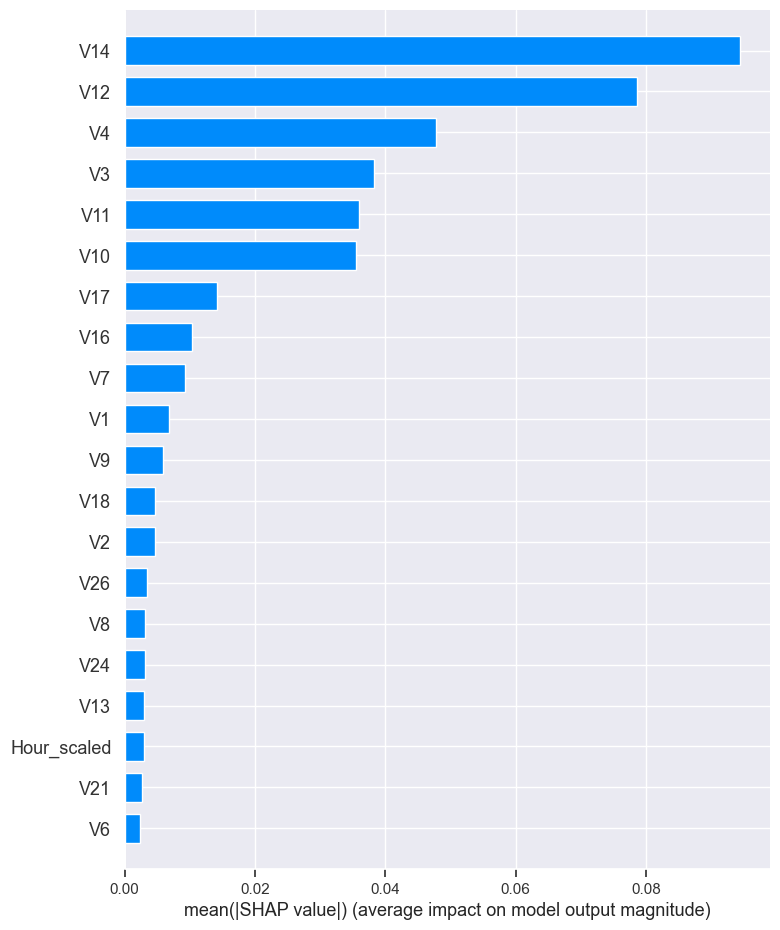

In [27]:
import shap

# Initialize JavaScript for interactive plots
shap.initjs()

# Create SHAP Explainer (auto handles classifier output shape)
explainer = shap.Explainer(rf_model.predict, X_train_smote)

# Compute SHAP values on first 100 test samples
shap_values = explainer(X_test[:100])

# Plot summary (bar chart of most important features)
shap.summary_plot(shap_values, X_test[:100], plot_type="bar")

C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\96436151.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lr, X_test[:100], plot_type="bar")


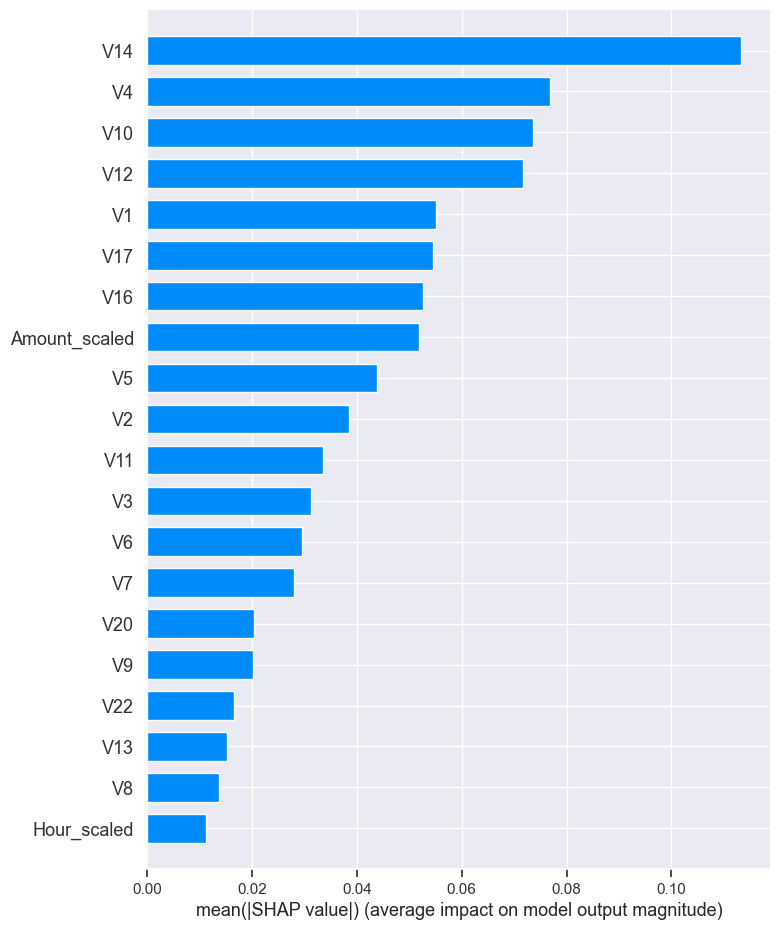

C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\96436151.py:14: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_test[:100], plot_type="bar")


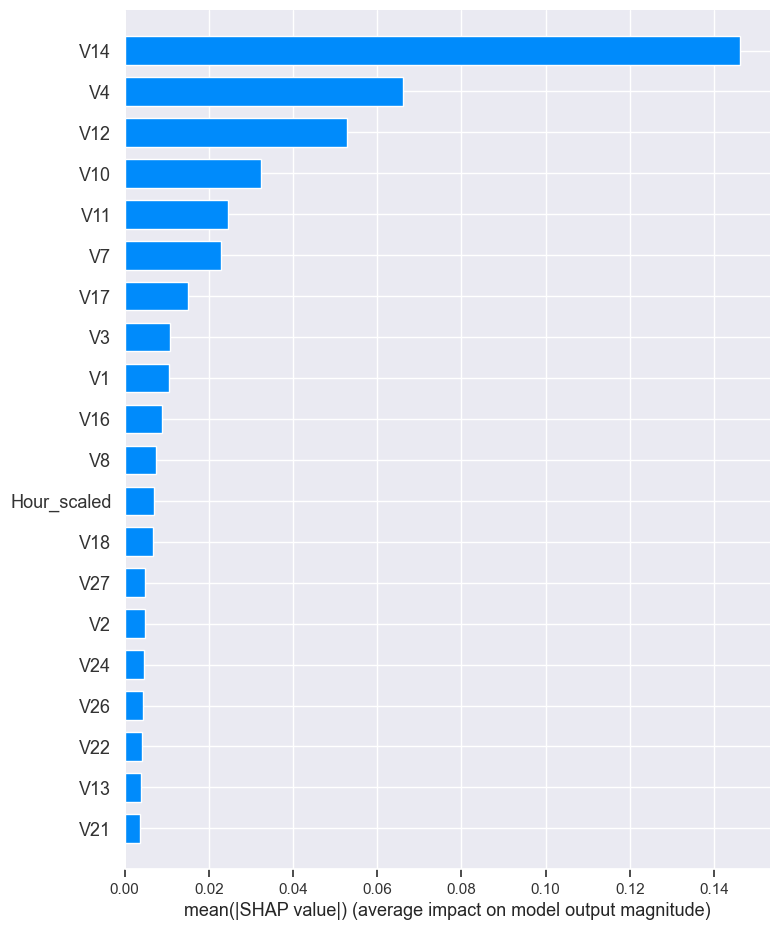

PermutationExplainer explainer: 101it [00:12,  1.71it/s]                         
C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\96436151.py:19: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_lgbm, X_test[:100], plot_type="bar")


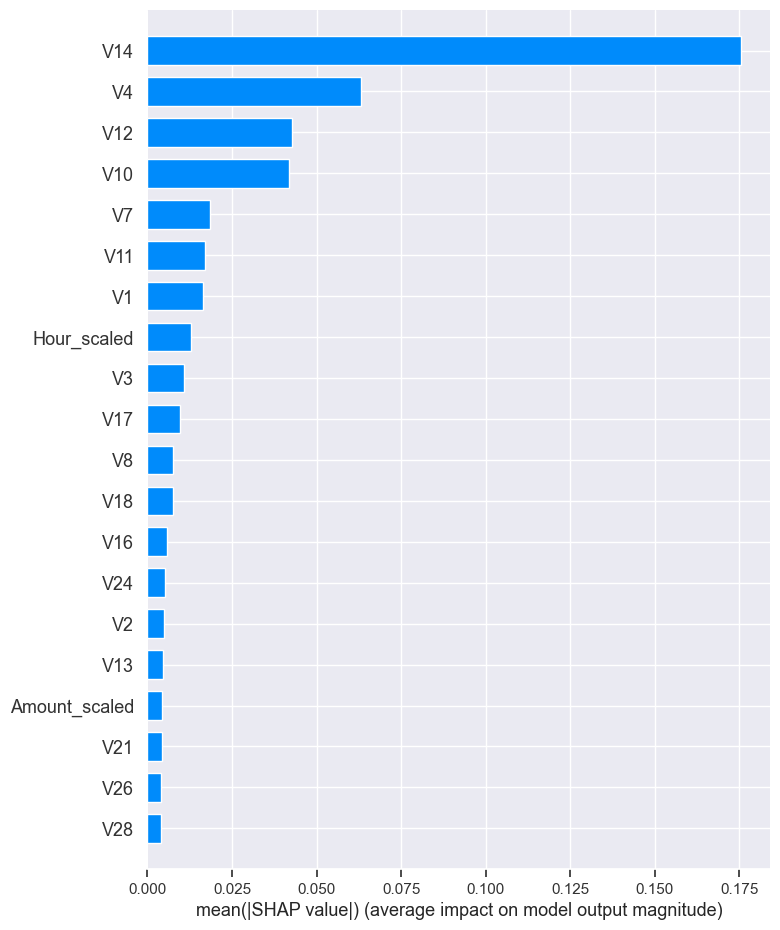

In [28]:
import shap

# SHAP visualizations
shap.initjs()

# Logistic Regression
explainer_lr = shap.Explainer(lr_model.predict, X_train_smote)
shap_values_lr = explainer_lr(X_test[:100])
shap.summary_plot(shap_values_lr, X_test[:100], plot_type="bar")

# XGBoost
explainer_xgb = shap.Explainer(xgb_model.predict, X_train_smote)
shap_values_xgb = explainer_xgb(X_test[:100])
shap.summary_plot(shap_values_xgb, X_test[:100], plot_type="bar")

# LightGBM
explainer_lgbm = shap.Explainer(lgbm_model.predict, X_train_smote)
shap_values_lgbm = explainer_lgbm(X_test[:100])
shap.summary_plot(shap_values_lgbm, X_test[:100], plot_type="bar")


C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\3660802296.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_metrics, ax=axes[i], palette=colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\3660802296.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_metrics, ax=axes[i], palette=colors)
C:\Users\Dell\AppData\Local\Temp\ipykernel_18900\3660802296.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=df_metrics, ax=axes[i], palette=colors)
C:\Users\D

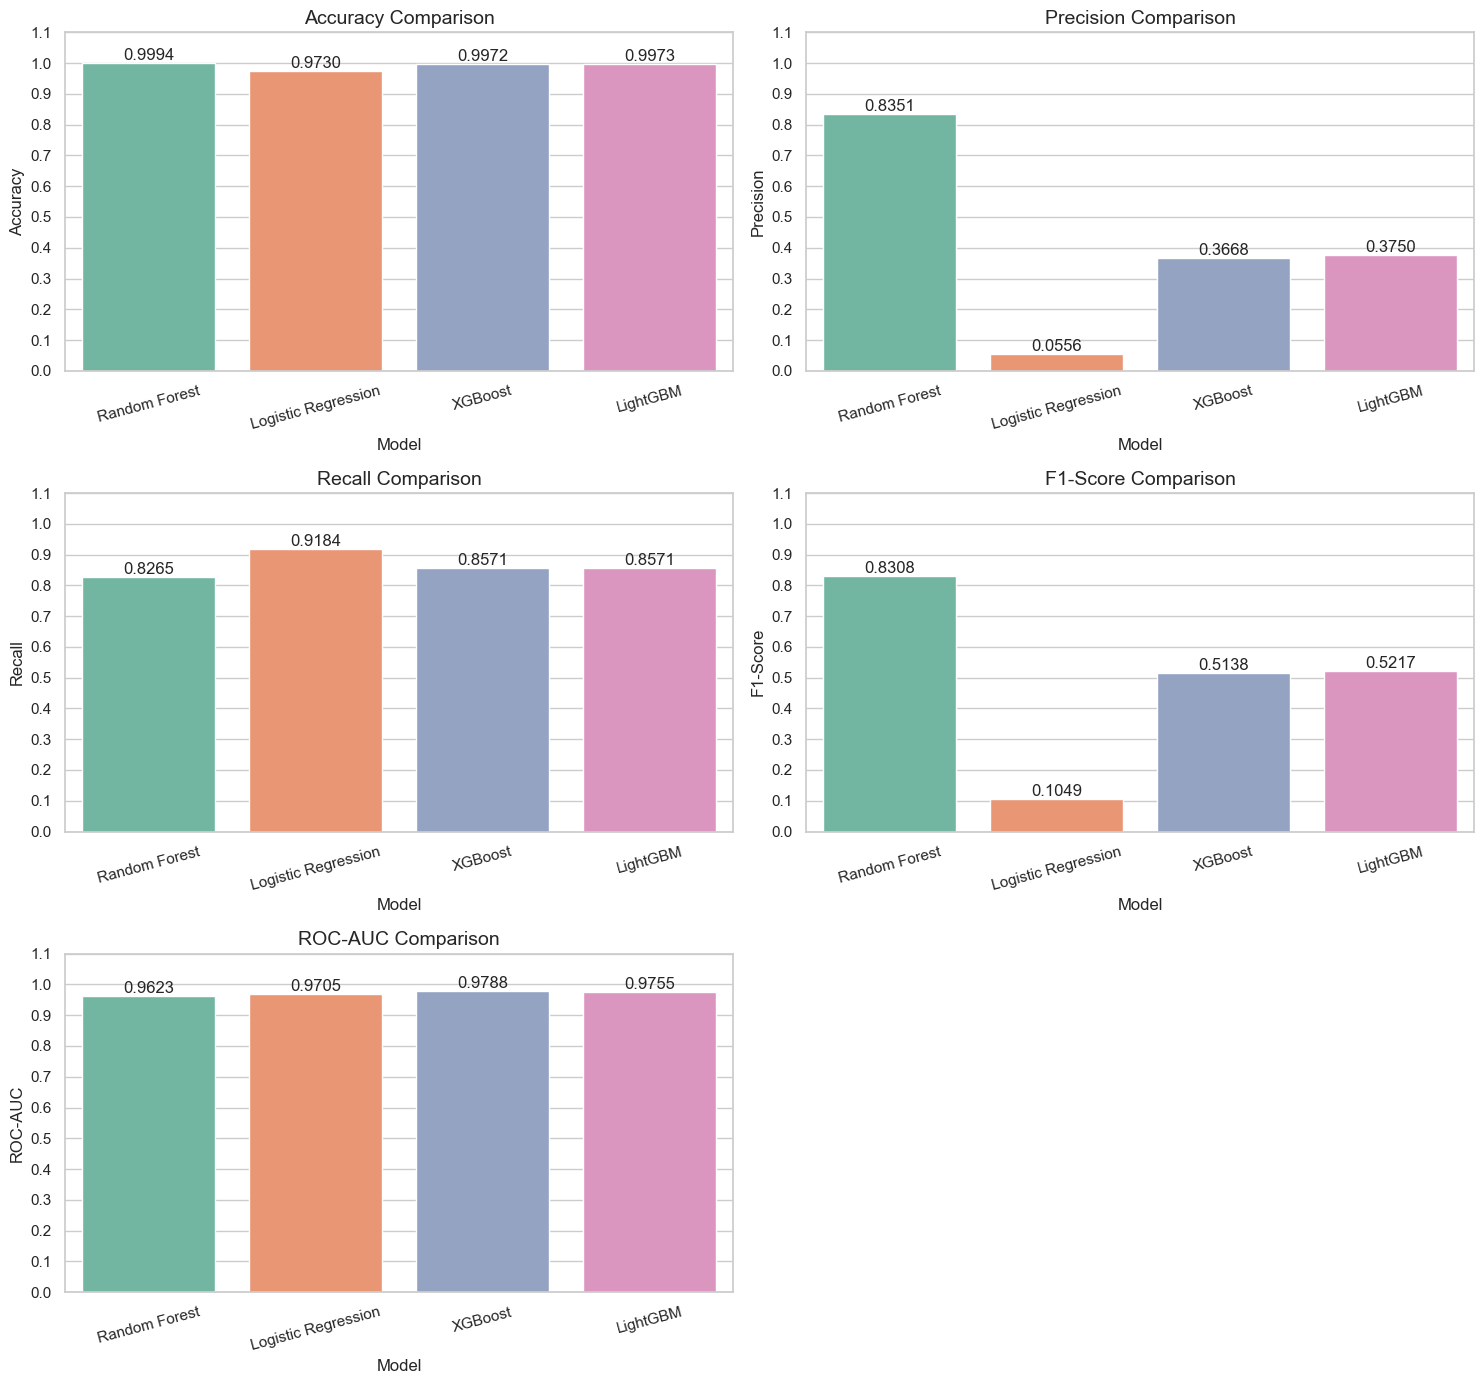

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Step 1: Define model evaluation metrics
metrics_data = {
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost', 'LightGBM'],
    'Accuracy': [0.9994, 0.9730, 0.9972, 0.9973],
    'Precision': [0.8351, 0.0556, 0.3668, 0.3750],
    'Recall': [0.8265, 0.9184, 0.8571, 0.8571],
    'F1-Score': [0.8308, 0.1049, 0.5138, 0.5217],
    'ROC-AUC': [0.9623, 0.9705, 0.9788, 0.9755]
}
df_metrics = pd.DataFrame(metrics_data)

# Step 2: Plot setup
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 14))
axes = axes.flatten()
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = sns.color_palette("Set2", len(df_metrics))

# Step 3: Create barplots for each metric with labels
for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=df_metrics, ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} Comparison', fontsize=14)
    axes[i].set_ylim(0, 1.1)
    axes[i].yaxis.set_major_locator(MaxNLocator(11))
    axes[i].tick_params(axis='x', rotation=15)

    # ✅ Add value labels on top of each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.4f', label_type="edge")

# Step 4: Clean layout and save
fig.delaxes(axes[-1])  # Remove the empty 6th subplot
plt.tight_layout()
plt.savefig("model_metrics_comparison.png", dpi=300)  # Save as high-res image
plt.show()


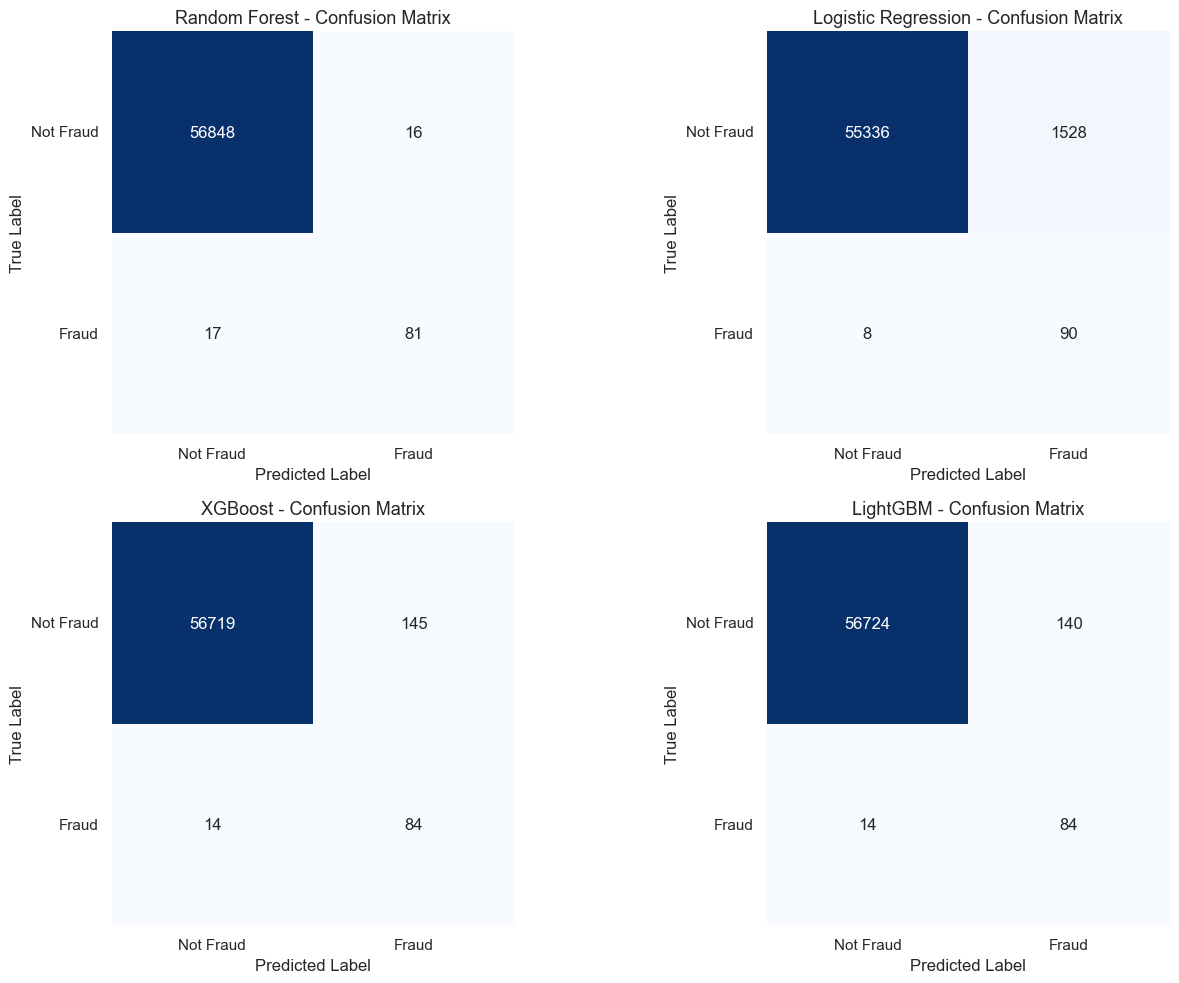

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ✅ Step 1: Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)

# ✅ Step 2: Prepare plot
models = ['Random Forest', 'Logistic Regression', 'XGBoost', 'LightGBM']
predictions = [y_pred_rf, y_pred_lr, y_pred_xgb, y_pred_lgbm]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, (model, y_pred) in enumerate(zip(models, predictions)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False, square=True)
    axes[i].set_title(f"{model} - Confusion Matrix", fontsize=13)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")
    axes[i].set_xticklabels(['Not Fraud', 'Fraud'])
    axes[i].set_yticklabels(['Not Fraud', 'Fraud'], rotation=0)

# ✅ Step 3: Save and show
plt.tight_layout()
plt.savefig("confusion_matrices_comparison.png", dpi=300)
plt.show()
